In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Krishna Baraskar\\Downloads\\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=["CustomerID","Gender","Spending Score (1-100)"],axis = 1,inplace=True)

In [7]:
df.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_29504\3680637504.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = "Age",data=df,palette="gist_ncar")


<Figure size 1000x500 with 0 Axes>

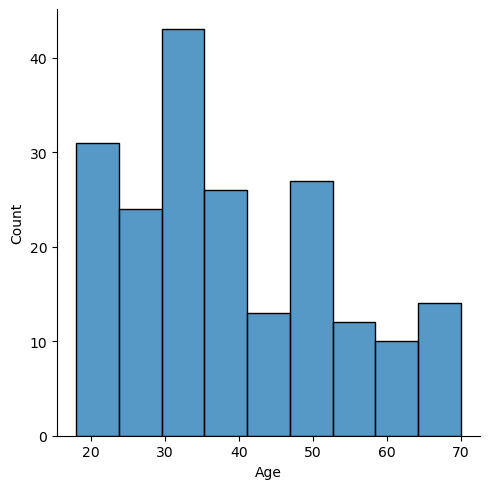

In [8]:
plt.figure(figsize=(10,5))
sns.displot(x = "Age",data=df,palette="gist_ncar")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

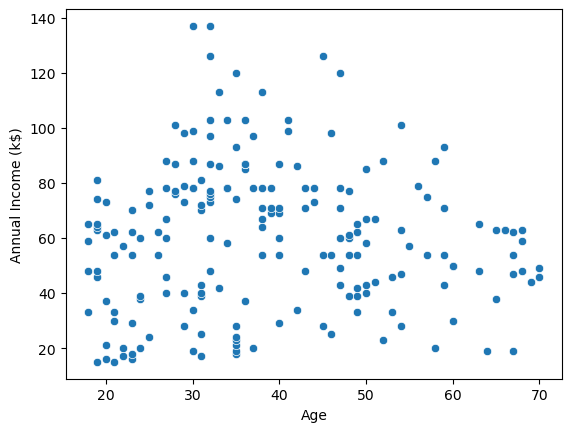

In [9]:
sns.scatterplot(x = "Age",y = "Annual Income (k$)",data=df)

In [10]:
# Feature Scaliing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_a = scaler.fit_transform(df)

In [11]:
df_s = pd.DataFrame(df_a,columns=["Age","Annual Income"])

<Axes: xlabel='Age', ylabel='Annual Income'>

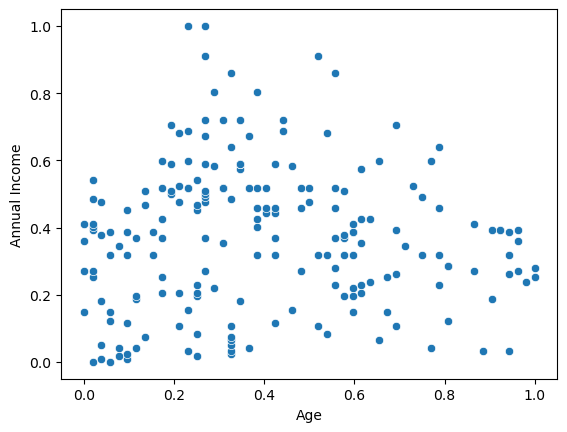

In [12]:
sns.scatterplot(x = "Age",y = "Annual Income",data=df_s)

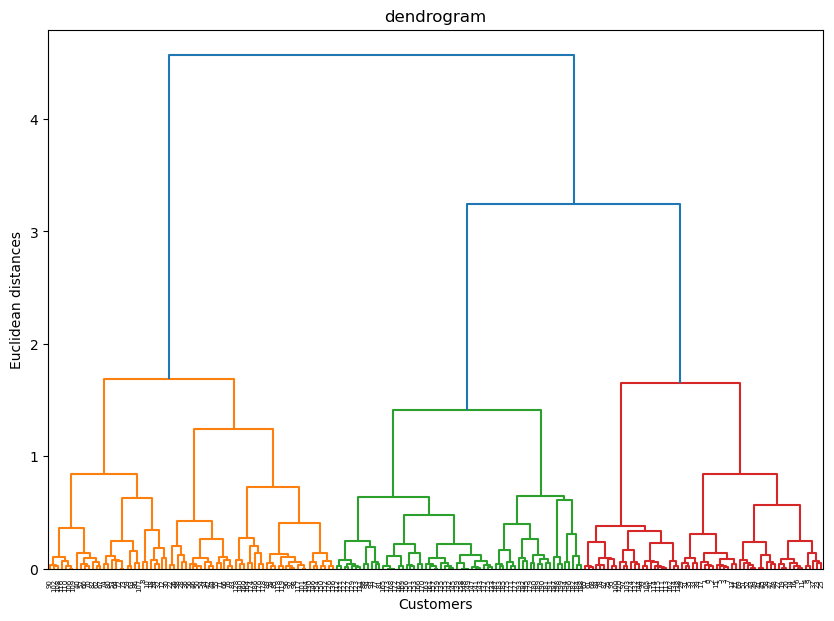

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))

dendo = shc.dendrogram(shc.linkage(df_s,method="ward"))
plt.title("dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

# Check the largest distance vertically without crossing horizontal line

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,linkage="ward")
cluster.fit_predict(df_s)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [15]:
cl = cluster.fit_predict(df_s)

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(df_s,cl)

0.4196733564813981

In [17]:
X = df_s.values

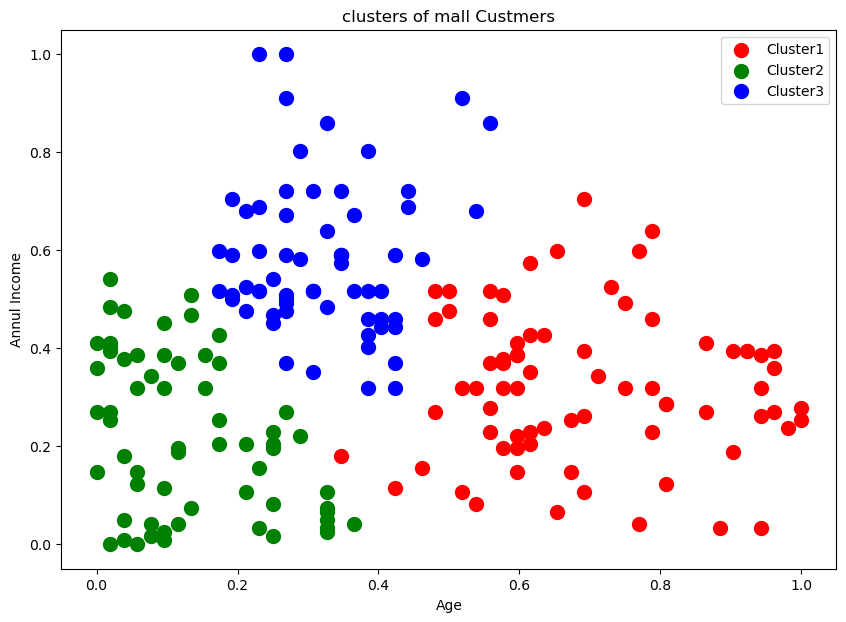

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0,0], X[cl ==0,1],s = 100, c = "red",label = "Cluster1")
plt.scatter(X[cl==1,0], X[cl ==1,1],s = 100, c = "green",label = "Cluster2")

plt.scatter(X[cl==2,0], X[cl ==2,1],s = 100, c = "blue",label = "Cluster3")
plt.title("clusters of mall Custmers")
plt.xlabel("Age")
plt.ylabel("Annul Income")
plt.legend()
plt.show()